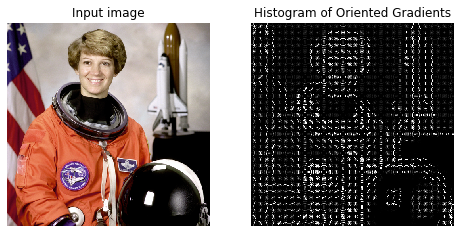

In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

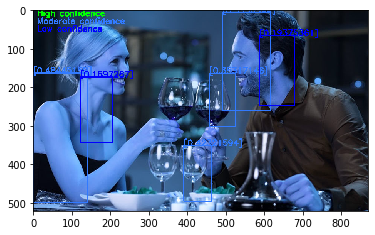

True

In [8]:
import cv2
import glob as glob
import os
import matplotlib.pyplot as plt
from time import time


hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


image_name = "jacob"
image = cv2.imread("img5.png")

start = time()
# keep a minimum image size for accurate predictions
if image.shape[1] < 400: # if image width < 400
    (height, width) = image.shape[:2]
    ratio = width / float(width) # find the width to height ratio
    image = cv2.resize(image, (400, width*ratio)) # resize the image according to the width to height ratio
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects, weights = hog.detectMultiScale(img_gray, winStride=(2, 2), padding=(10, 10), scale=1.02)
end = time()
for i, (x, y, w, h) in enumerate(rects):
    if weights[i] < 0.13:
        continue
    elif weights[i] < 0.3 and weights[i] > 0.13:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.putText(image, str(weights[i]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    if weights[i] < 0.7 and weights[i] > 0.3:
        cv2.rectangle(image, (x, y), (x+w, y+h), (50, 122, 255), 2)
        cv2.putText(image, str(weights[i]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
    if weights[i] > 0.7:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, str(weights[i]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(image, 'High confidence', (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(image, 'Moderate confidence', (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (50, 122, 255), 2)
cv2.putText(image, 'Low confidence', (10, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.imshow(image)
plt.show()
f = open("times.txt", "a")
f.write("\nimg 5 " + str(end - start))
f.close()
# cv2.imwrite("img5out.jpg", image)